In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [4]:
df = pd.read_csv(r"C:\Users\lenovo\OneDrive\Desktop\sklearn-models\data\student_course_recommendation_dataset.csv")

In [5]:
df.head()

,Math_Score,Programming_Score,Logical_Reasoning_Score,Communication_Skill_Score,GPA,Interest_AI,Interest_Web,Interest_Cyber,Interest_Cloud,Recommended_Course
0,78.0,63,42.0,58.0,7.25,0,1,1,0,Data_Science
1,91.0,68,35.0,89.0,7.57,0,1,1,0,Web_Development
2,68.0,55,42.0,47.0,9.95,0,0,0,1,Data_Science
3,54.0,63,63.0,64.0,6.16,1,1,0,1,Cloud_Computing
4,82.0,83,39.0,72.0,9.71,0,0,0,0,Data_Science


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Math_Score                 982 non-null    float64
 1   Programming_Score          1000 non-null   int64  
 2   Logical_Reasoning_Score    991 non-null    float64
 3   Communication_Skill_Score  992 non-null    float64
 4   GPA                        1000 non-null   float64
 5   Interest_AI                1000 non-null   int64  
 6   Interest_Web               1000 non-null   int64  
 7   Interest_Cyber             1000 non-null   int64  
 8   Interest_Cloud             1000 non-null   int64  
 9   Recommended_Course         1000 non-null   object 
dtypes: float64(4), int64(5), object(1)
memory usage: 78.3+ KB


In [7]:
df['Recommended_Course'].value_counts()

Recommended_Course
Data_Science       425
Web_Development    222
Cyber_Security     149
Cloud_Computing    116
AI_ML               88
Name: count, dtype: int64

In [8]:
df.isnull().sum()[df.isnull().sum()>0]

Math_Score                   18
Logical_Reasoning_Score       9
Communication_Skill_Score     8
dtype: int64

In [9]:
target_col = "Recommended_Course"

In [10]:
df[target_col].unique()

array(['Data_Science', 'Web_Development', 'Cloud_Computing',
       'Cyber_Security', 'AI_ML'], dtype=object)

In [11]:
X = df.drop('Recommended_Course', axis=1)
y = df[target_col]

In [12]:
X.head()

,Math_Score,Programming_Score,Logical_Reasoning_Score,Communication_Skill_Score,GPA,Interest_AI,Interest_Web,Interest_Cyber,Interest_Cloud
0,78.0,63,42.0,58.0,7.25,0,1,1,0
1,91.0,68,35.0,89.0,7.57,0,1,1,0
2,68.0,55,42.0,47.0,9.95,0,0,0,1
3,54.0,63,63.0,64.0,6.16,1,1,0,1
4,82.0,83,39.0,72.0,9.71,0,0,0,0


In [13]:
y.head()

0       Data_Science
1    Web_Development
2       Data_Science
3    Cloud_Computing
4       Data_Science
Name: Recommended_Course, dtype: object

In [14]:
X.isnull().sum()[X.isnull().sum()>0]

Math_Score                   18
Logical_Reasoning_Score       9
Communication_Skill_Score     8
dtype: int64

In [15]:
nan_col = ['Math_Score', 'Logical_Reasoning_Score', 'Communication_Skill_Score']

In [16]:
X[nan_col].head()

,Math_Score,Logical_Reasoning_Score,Communication_Skill_Score
0,78.0,42.0,58.0
1,91.0,35.0,89.0
2,68.0,42.0,47.0
3,54.0,63.0,64.0
4,82.0,39.0,72.0


In [17]:
X[nan_col].isnull().sum()

Math_Score                   18
Logical_Reasoning_Score       9
Communication_Skill_Score     8
dtype: int64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, test_size=0.2, stratify=y
)

In [19]:
X_train.isnull().sum()[X_train.isnull().sum()>0]

Math_Score                   14
Logical_Reasoning_Score       7
Communication_Skill_Score     6
dtype: int64

In [20]:
knn_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler',StandardScaler()),
    ('model' , KNeighborsClassifier())
])

In [21]:
knn_params_grid = {
    'model__n_neighbors':[3,5,7,9],
    'model__weights':['uniform', 'distance'],
    'model__metric':['euclidean', 'manhattan']
}

knn_grid = GridSearchCV(
    knn_pipeline,
    knn_params_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

knn_grid.fit(X_train, y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...lassifier())])
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'model__metric': ['euclidean', 'manhattan'], 'model__n_neighbors': [3, 5, ...], 'model__weights': ['uniform', 'distance']}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and par

In [22]:
imputed = knn_pipeline.named_steps["imputer"].fit_transform(X_train)
pd.DataFrame(imputed, columns=X_train.columns).isnull().sum().sum()

np.int64(0)

In [23]:
log_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=2000))
])

In [24]:
log_param_grid = {
    "model__C": [0.01, 0.1, 1, 10],
    "model__solver": ["lbfgs"],
}

log_grid = GridSearchCV(
    log_pipeline,
    log_param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

log_grid.fit(X_train, y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step..._iter=2000))])
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'model__C': [0.01, 0.1, ...], 'model__solver': ['lbfgs']}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also displayed;

In [40]:
class_weights = {
    "Data_Science": 1,
    "Web_Development": 1.2,
    "Cyber_Security": 1.5,
    "Cloud_Computing": 2,
    "AI_ML": 2.5
}

In [41]:
svm_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("model", SVC(probability=True, class_weight="balanced"))
])

In [42]:
svm_param_grid = {
    "model__C": [0.1, 1, 10],
    "model__kernel": ["linear", "rbf"],
    "model__gamma": ["scale", "auto"]
}

svm_grid = GridSearchCV(
    svm_pipeline,
    svm_param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

svm_grid.fit(X_train, y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...ility=True))])
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'model__C': [0.1, 1, ...], 'model__gamma': ['scale', 'auto'], 'model__kernel': ['linear', 'rbf']}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displ

In [43]:
results = pd.DataFrame({
    "Model": ["KNN", "Logistic Regression", "SVM"],
    "Best CV Accuracy": [
        knn_grid.best_score_,
        log_grid.best_score_,
        svm_grid.best_score_
    ],
    "Best Parameters": [
        knn_grid.best_params_,
        log_grid.best_params_,
        svm_grid.best_params_
    ]
})

results.sort_values(by="Best CV Accuracy", ascending=False)

,Model,Best CV Accuracy,Best Parameters
2,SVM,0.90125,"{'model__C': 10, 'model__gamma': 'scale', 'mod..."
1,Logistic Regression,0.87750,"{'model__C': 10, 'model__solver': 'lbfgs'}"
0,KNN,0.84000,"{'model__metric': 'manhattan', 'model__n_neigh..."


In [44]:
best_svm = svm_grid.best_estimator_
best_svm

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('imputer', ...), ('scaler', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"missing_values missing_values: int, float, str, np.nan, None or pandas.NA, default=np.nanThe placeholder for the missing values. All occurrences of`missing_values` will be imputed. For pandas' dataframes withnullable integer dtypes with missing values, `missing_values`can be set to either `np.nan` or `pd.NA`.",nan
,"strategy strategy: str or Callable, default='mean'The imputation strategy.- If ""mean"", then replace missing values using the mean along each column. Can only be used with numeric data.- If ""median"", then replace missing values using the median along each column. Can only be used with numeric data.- If ""most_frequent"", then replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.- If ""constant"", then replace missing values with fill_value. Can be used with strings or numeric data.- If an instance of Callable, then replace missing values using the scalar statistic returned by running the callable over a dense 1d array containing non-missing values of each column... versionadded:: 0.20 strategy=""constant"" for fixed value imputation... versionadded:: 1.5 strategy=callable for custom value imputation.",'median'
,"fill_value fill_value: str or numerical value, default=NoneWhen strategy == ""constant"", `fill_value` is used to replace alloccurrences of missing_values. For string or object data types,`fill_value` must be a string.If `None`, `fill_value` will be 0 when imputing numericaldata and ""missing_value"" for strings or object data types.",None
,"copy copy: bool, default=TrueIf True, a copy of X will be created. If False, imputation willbe done in-place whenever possible. Note that, in the following cases,a new copy will always be made, even if `copy=False`:- If `X` is not an array of floating values;- If `X` is encoded as a CSR matrix;- If `add_indicator=True`.",True
,"add_indicator add_indicator: bool, default=FalseIf True, a :class:`MissingIndicator` transform will stack onto outputof the imputer's transform. This allows a predictive estimatorto account for missingness despite imputation. I

In [45]:
y_pred = best_svm.predict(X_test)
y_pred

array(['Web_Development', 'Cloud_Computing', 'Data_Science',
       'Data_Science', 'Cyber_Security', 'Cyber_Security',
       'Web_Development', 'Cyber_Security', 'Data_Science',
       'Data_Science', 'AI_ML', 'AI_ML', 'Web_Development', 'AI_ML',
       'Web_Development', 'Cyber_Security', 'Web_Development',
       'Data_Science', 'Cyber_Security', 'Web_Development',
       'Cyber_Security', 'Data_Science', 'AI_ML', 'Cyber_Security',
       'AI_ML', 'Cloud_Computing', 'Data_Science', 'Web_Development',
       'Cloud_Computing', 'Data_Science', 'Data_Science',
       'Cyber_Security', 'Data_Science', 'Data_Science',
       'Cloud_Computing', 'Data_Science', 'Web_Development',
       'Data_Science', 'Cyber_Security', 'Data_Science',
       'Web_Development', 'Web_Development', 'AI_ML', 'AI_ML',
       'Data_Science', 'Data_Science', 'Data_Science', 'Cloud_Computing',
       'Data_Science', 'Web_Development', 'Cloud_Computing',
       'Data_Science', 'Data_Science', 'Data_Science', 'Web

In [46]:
confusion_matrix(y_test, y_pred)

array([[17,  0,  1,  0,  0],
       [ 1, 21,  0,  0,  1],
       [ 1,  0, 29,  0,  0],
       [ 2,  3,  1, 79,  0],
       [ 2,  1,  0,  0, 41]])

In [47]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

          AI_ML       0.74      0.94      0.83        18
Cloud_Computing       0.84      0.91      0.88        23
 Cyber_Security       0.94      0.97      0.95        30
   Data_Science       1.00      0.93      0.96        85
Web_Development       0.98      0.93      0.95        44

       accuracy                           0.94       200
      macro avg       0.90      0.94      0.91       200
   weighted avg       0.94      0.94      0.94       200



In [48]:
print("Macro Precision:", precision_score(y_test, y_pred, average='macro'))
print("Macro Recall:", recall_score(y_test, y_pred, average='macro'))
print("Macro F1:", f1_score(y_test, y_pred, average='macro'))

Macro Precision: 0.8981609563881653
Macro Recall: 0.937076907179209
Macro F1: 0.9143981942106878


In [49]:
my_student = pd.DataFrame([{
    "Math_Score": 100,
    "Programming_Score": 100,
    "Logical_Reasoning_Score": 100,
    "Communication_Skill_Score": 100,
    "GPA": 8.5,
    "Interest_AI": 1,
    "Interest_Web": 0,
    "Interest_Cyber": 0,
    "Interest_Cloud": 0
}])

prediction = best_svm.predict(my_student)

print("Recommended Course:", prediction[0])

Recommended Course: AI_ML


In [50]:
proba = best_svm.predict_proba(my_student)[0]
classes = best_svm.named_steps["model"].classes_

top3_idx = np.argsort(proba)[-3:][::-1]

for idx in top3_idx:
    print(classes[idx], ":", round(proba[idx]*100, 2), "%")

AI_ML : 97.66 %
Data_Science : 1.01 %
Cyber_Security : 0.88 %


In [51]:
# import joblib

# best_model = svm_grid.best_estimator_

# joblib.dump(best_model, "svm_course_recommender.pkl")

# print("Model saved successfully ✅")


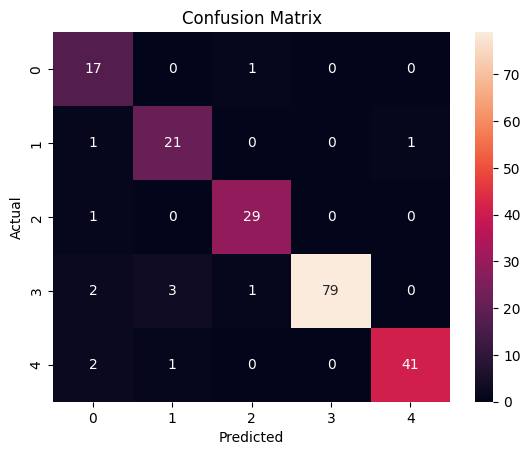

In [52]:
cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [53]:
pd.Series(y_pred).value_counts()

Data_Science       79
Web_Development    42
Cyber_Security     31
Cloud_Computing    25
AI_ML              23
Name: count, dtype: int64

In [54]:
y_test.value_counts()

Recommended_Course
Data_Science       85
Web_Development    44
Cyber_Security     30
Cloud_Computing    23
AI_ML              18
Name: count, dtype: int64

In [56]:
y_train.value_counts()

Recommended_Course
Data_Science       340
Web_Development    178
Cyber_Security     119
Cloud_Computing     93
AI_ML               70
Name: count, dtype: int64